In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [6]:
df=pd.read_csv('/content/car_evaluation.csv')

In [7]:
df.shape

(1727, 7)

In [8]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [10]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
for col in col_names:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [13]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [15]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [16]:
x=df.drop(['class'],axis = 1)
y=df['class']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state= 40)

In [21]:
x_train.shape

(1157, 6)

In [22]:
x_test.shape

(570, 6)

In [24]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [26]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1126,med,med,3,more,small,high
638,high,high,5more,more,small,low
1575,low,med,4,4,small,med
1295,low,vhigh,2,2,small,low
660,high,med,2,4,med,med


In [30]:
!pip install category_encoders

import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 885.8 kB/s eta 0:00:00


In [31]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_train=encoder.fit_transform(x_train)
x_test=encoder.fit_transform(x_test)

In [32]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
1126,1,1,1,1,1,1
638,2,2,2,1,1,2
1575,3,1,3,2,1,3
1295,3,3,4,3,1,2
660,2,1,4,2,2,3


In [33]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
622,1,1,1,1,1,1
360,2,2,2,2,1,2
1166,3,3,1,1,2,3
1673,4,2,3,1,1,3
1206,3,2,4,3,1,2


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
ginni = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
ginni.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
y_ginni=ginni.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [43]:
print("Model accuracy score with gini index: {0:0.04f}".format(accuracy_score(y_test,y_ginni)))

Model accuracy score with gini index: 0.4211


In [44]:
y_train_ginni=ginni.predict(x_train)
y_train_ginni

array(['acc', 'unacc', 'acc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [45]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_ginni)))

Training-set accuracy score: 0.7727


In [46]:
print('Training set score: {:.4f}'.format(ginni.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(ginni.score(x_test, y_test)))

Training set score: 0.7727
Test set score: 0.4211


[Text(0.625, 0.875, 'x[3] <= 2.5\ngini = 0.467\nsamples = 1157\nvalue = [262, 49, 800, 46]'),
 Text(0.5, 0.625, 'x[5] <= 1.5\ngini = 0.584\nsamples = 784\nvalue = [262, 49, 427, 46]'),
 Text(0.25, 0.375, 'x[0] <= 3.5\ngini = 0.643\nsamples = 274\nvalue = [142, 23, 63, 46]'),
 Text(0.125, 0.125, 'gini = 0.624\nsamples = 203\nvalue = [111, 23, 23, 46]'),
 Text(0.375, 0.125, 'gini = 0.492\nsamples = 71\nvalue = [31, 0, 40, 0]'),
 Text(0.75, 0.375, 'x[5] <= 2.5\ngini = 0.433\nsamples = 510\nvalue = [120, 26, 364, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 250\nvalue = [0, 0, 250, 0]'),
 Text(0.875, 0.125, 'gini = 0.585\nsamples = 260\nvalue = [120, 26, 114, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 373\nvalue = [0, 0, 373, 0]')]

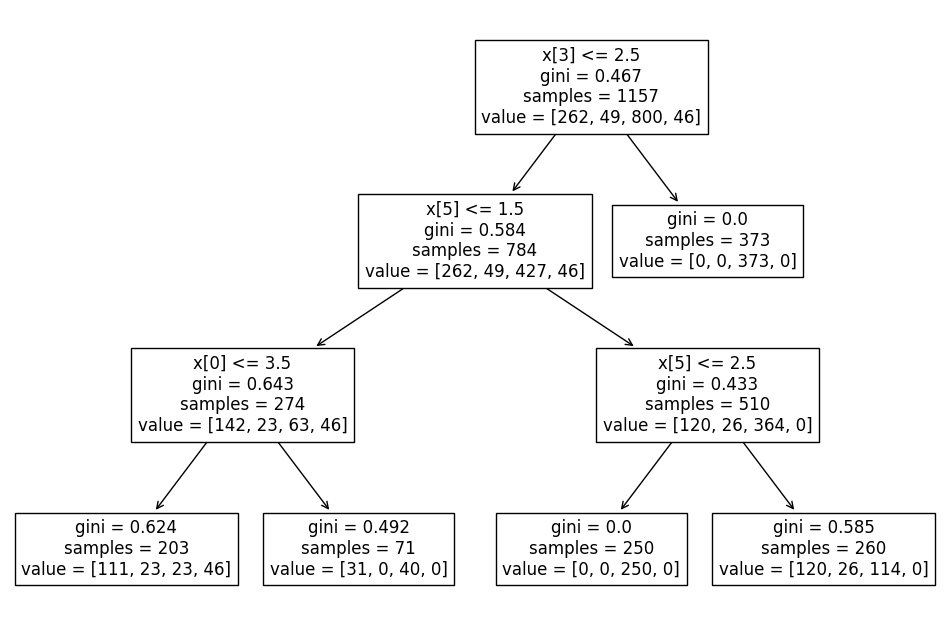

In [48]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(ginni.fit(x_train, y_train))

In [51]:
# Ensure x_train is a DataFrame
print(type(x_train))

# Print the columns of x_train
print(x_train.columns)

# Print the first few rows of x_train to inspect the data
print(x_train.head())

# Print y_train to check the class names
print(y_train.unique())


<class 'pandas.core.frame.DataFrame'>
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
      buying  maint  doors  persons  lug_boot  safety
1126       1      1      1        1         1       1
638        2      2      2        1         1       2
1575       3      1      3        2         1       3
1295       3      3      4        3         1       2
660        2      1      4        2         2       3
['acc' 'unacc' 'vgood' 'good']


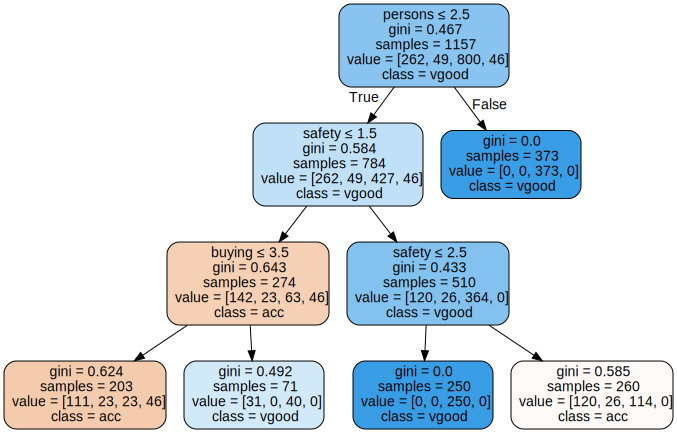

In [52]:
import graphviz
from sklearn import tree

# Ensure class names are strings
class_names = y_train.unique().astype(str)

# Export the decision tree to a dot file
dot_data = tree.export_graphviz(ginni, out_file=None,
                                feature_names=x_train.columns,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
graph


In [54]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [55]:
y_pred_en = clf_en.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.4211


In [57]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array(['acc', 'unacc', 'acc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [58]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7727


In [59]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.7727
Test set score: 0.4211


[Text(0.625, 0.875, 'x[3] <= 2.5\nentropy = 1.231\nsamples = 1157\nvalue = [262, 49, 800, 46]'),
 Text(0.5, 0.625, 'x[5] <= 1.5\nentropy = 1.496\nsamples = 784\nvalue = [262, 49, 427, 46]'),
 Text(0.25, 0.375, 'x[0] <= 3.5\nentropy = 1.711\nsamples = 274\nvalue = [142, 23, 63, 46]'),
 Text(0.125, 0.125, 'entropy = 1.673\nsamples = 203\nvalue = [111, 23, 23, 46]'),
 Text(0.375, 0.125, 'entropy = 0.988\nsamples = 71\nvalue = [31, 0, 40, 0]'),
 Text(0.75, 0.375, 'x[5] <= 2.5\nentropy = 1.057\nsamples = 510\nvalue = [120, 26, 364, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 250\nvalue = [0, 0, 250, 0]'),
 Text(0.875, 0.125, 'entropy = 1.369\nsamples = 260\nvalue = [120, 26, 114, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 373\nvalue = [0, 0, 373, 0]')]

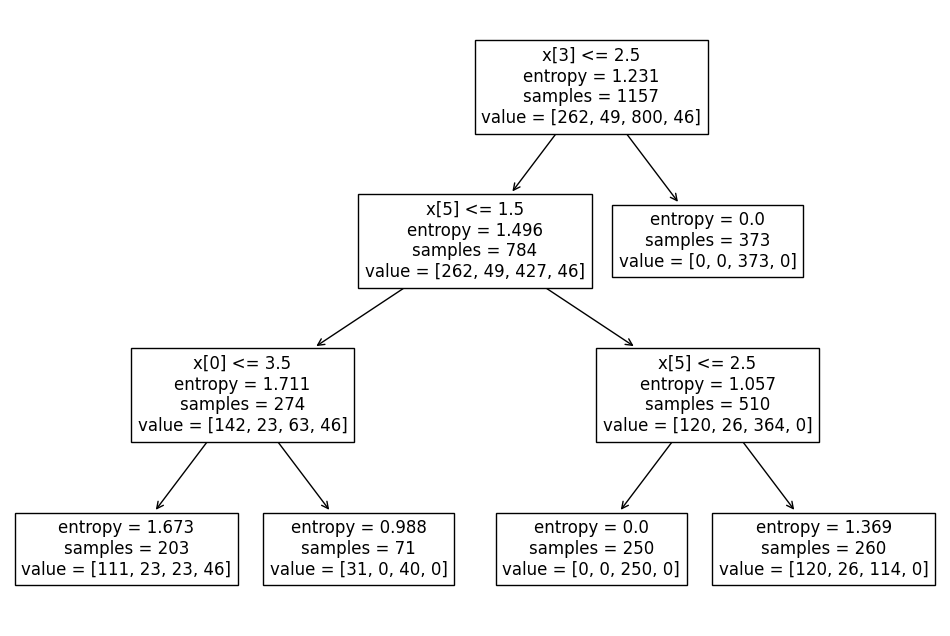

In [60]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train))

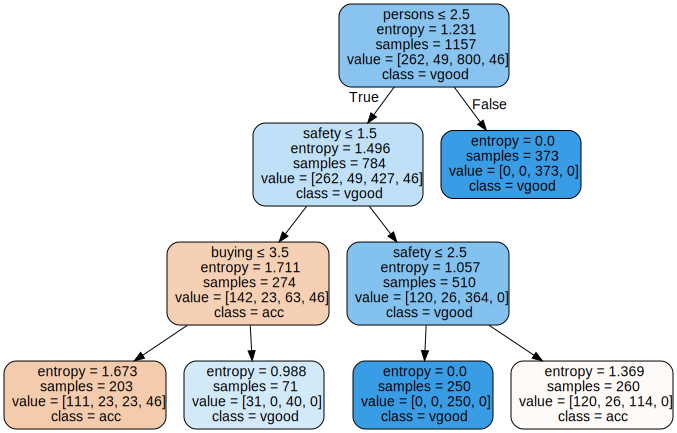

In [71]:
import graphviz
from sklearn import tree

# Export the decision tree to a dot file
dot_data = tree.export_graphviz(clf_en, out_file=None,
                                feature_names=x_train.columns,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Display the graph
graph


In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 33   0  89   0]
 [  1   0  19   0]
 [202   0 207   0]
 [  4   0  15   0]]


In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.14      0.27      0.18       122
        good       0.00      0.00      0.00        20
       unacc       0.63      0.51      0.56       409
       vgood       0.00      0.00      0.00        19

    accuracy                           0.42       570
   macro avg       0.19      0.19      0.19       570
weighted avg       0.48      0.42      0.44       570

